In [644]:
import pandas as pd

# Data Import

## Import User Profile Data

In [645]:
profile = pd.read_json('./Starbucks/profile.json', lines=True)

In [646]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [647]:
profile.shape

(17000, 5)

### How many NaN values do we have

In [648]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

### That's a lot, will have to impute values somehow

## Breakdown the gender field

In [649]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

### None values in gender field are empty, fill with not specified

## Import Offer Transcript Data

In [650]:
transcript = pd.read_json('./Starbucks/transcript.json', lines = True)

In [651]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [652]:
transcript.shape

(306534, 4)

### What are the possible events?

In [653]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### What is the time field?

In [654]:
transcript.time.value_counts()

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

### Looks like it is amount of time in hours since the start of dataset

## Import portfolio json

In [655]:
portfolio = pd.read_json('./Starbucks/portfolio.json', lines = True)

In [656]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [657]:
portfolio.shape

(10, 6)

In [658]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

### Going to need to dumify channels column, and it looks like easy merges to single DF

# Defining Color Pallete

In [659]:
color1 = '#00704A'
color2 = '#FF9FE5'
color3 = '#45062E'
backgroundColor = '#B8A085'
ccs = ['#ACDDA9', '#00704A', '#002F20']
dcs = ['#002619','#008256', '#00de92', '#a1ffdf', '#fdfffe']

# Data Wrangling

## Cleaning Profile

In [660]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

### Fill empty 'gender' values with NS (not specified)

In [661]:
profile['gender'] = profile.gender.fillna('NS')
profile.gender.value_counts()

M     8484
F     6129
NS    2175
O      212
Name: gender, dtype: int64

### Visualize Gender Breakdown

In [662]:
import plotly.express as px
s = profile.gender.value_counts().rename_axis('gender').reset_index(name='counts')
s



gender  counts
0      M    8484
1      F    6129
2     NS    2175
3      O     212

In [663]:
s = profile.gender.value_counts().rename_axis('gender').reset_index(name='counts')
fig = px.bar(s, x = 'gender', y='counts', color = 'gender', color_discrete_sequence= dcs,
                  title = 'Distribution of Gender of Customer',
                   labels = {
                       'variable':'',
                       'gender':'Gender'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Gender',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        ticktext = ['Male', 'Female', 'Not Specified', 'Other'],
        tickvals = ['M', 'F', 'NS', 'O'],
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98,
        bgcolor = '#DFBA8F',
        bordercolor = 'black',
        borderwidth = 2,
        font = dict(
            color = 'black'
        )
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
newnames = {'M':'Male', 'F':'Female', 'NS':'Not Specified', 'O':'Other'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

### Distribution of Age Field looks suspicious

In [664]:
fig = px.histogram(profile, x = 'age' ,color_discrete_sequence=[color1,color2 ],nbins=200,
                  title = 'Distribution of Age of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Age (years)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

#### Looks like the value 118 is filled in for not specified
+ can we impute the age based on income?
+ create a new column for age specified or not

In [665]:
profile.loc[profile['age']==118].income.value_counts()

Series([], Name: income, dtype: int64)

##### Every single entry which specified age as 118 did not specify income either, does it run the other way?

In [666]:
profile.loc[profile['income'].isna()].age.value_counts()

118    2175
Name: age, dtype: int64

##### Sure does, there is a large group of customer profiles (n = 2175, 13%) with unspecified information in any field. How do we fix this?
+ This is too many values to impute a single number for
+ add a new binary column for anonymous users
+ fill in fields with a normal distribution equal to the remaining data

In [667]:
import numpy as np
profile['anonymous'] = 0
profile['anonymous'] = np.where(profile['age']== 118, 1, 0)
profile

gender  age                                id  became_member_on  \
0         NS  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

#### Find std and mean of age field without '118' values

In [668]:
ageSTD = np.std(profile.loc[profile['age']!= 118].age)
ageSTD

17.383119058990765

In [669]:
ageMean = np.mean(profile.loc[profile['age']!= 118].age)
ageMean

54.39352445193929

In [670]:
from scipy.stats import truncnorm
lower, upper = 18, 101
mu, sigma = ageMean, ageSTD
X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

profile.loc[profile['age']==118, ['age']] = X.rvs(len(profile.loc[profile['age']==118, ['age']]))
profile

gender        age                                id  became_member_on  \
0         NS  59.721738  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F  55.000000  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  65.535170  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F  75.000000  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  25.545380  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...        ...                               ...               ...   
16995      F  45.000000  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M  61.000000  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M  49.000000  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F  83.000000  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F  62.000000  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

In [671]:
profile.loc[:,['age']] = profile.age.round()
profile


gender   age                                id  became_member_on  \
0         NS  60.0  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F  55.0  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  66.0  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F  75.0  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  26.0  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...   ...                               ...               ...   
16995      F  45.0  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M  61.0  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M  49.0  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F  83.0  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F  62.0  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

In [672]:
profile.loc[:,['age']] = pd.to_numeric(profile.age, downcast='integer')
profile

gender  age                                id  became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   26  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

#### Evaluate changes

In [673]:
ageSTD - np.std(profile.age)

0.1738559430674229

In [674]:
ageMean - np.mean(profile.age)

-0.033122606884234074

In [675]:
fig = px.histogram(profile, x = 'age' ,color_discrete_sequence=[color1,color2 ],nbins=102-18,
                  title = 'Distribution of Age of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Age (years)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

### Let's do the same with the Income field

#### Initial distribution

In [676]:
fig = px.histogram(profile, x = 'income' ,color_discrete_sequence=[color1,color2 ],nbins=150,
                  title = 'Distribution of Income of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Income ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

#### From the look of this distribution it may be worthwhile to cluster and generate values from a uniform distribution across clusters

In [677]:
from sklearn.cluster import KMeans
from PlottingFunctions import plot_inertia, plot_silhouette

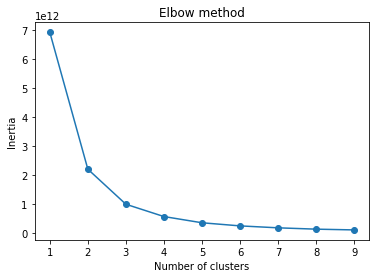

KMeans(n_clusters=4)

In [678]:
kmeans = KMeans()
yClus = profile.loc[profile['income'].notna(), ['income']]
plot_inertia(kmeans, yClus, range(1, 10))



kmeans.set_params(n_clusters = 4)
kmeans.fit(profile.loc[profile['income'].notna(), ['income']])

In [679]:
kmeans.labels_

array([0, 0, 2, ..., 2, 1, 2])

### Lets test this out, lets create a copy of the DF and create a new column for income cluster and see what it looks like

In [680]:
profileCopy = profile
profileCopy['income_cluster'] = np.nan

In [681]:
profileCopy.loc[profileCopy['income'].notna(), ['income_cluster']] = kmeans.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [682]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   26  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0           NaN          1            NaN  
1      112000.0          0            0.0  
2           NaN          1            NaN  
3      100000.0          0            0.0  
4           NaN          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            1.0  
16996   72000.0          0            2.0  
16997   73000.0          0            2.0  
16998   50000.0          0            1.0  
16999   82000.0          0            2.0  

[17000 rows x 7 columns]

In [683]:
fig = px.histogram(profileCopy.loc[profileCopy['income'].notna()], x = 'income' ,color = 'income_cluster',nbins=150, 
                   color_discrete_sequence=dcs,
                  title = 'Distribution of Income of Customer by Cluster',
                   labels = {
                       'income_cluster':'Income Cluster'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Income ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
newnames = {'1.0':'Cluster 1', '3.0':'Cluster 3', '0.0':'Cluster 0', '2.0':'Cluster 2', '4.0': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

### Now that our income is clustered let's see if there is any relationship between non anonymous users age and income

In [684]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age($)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1539.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          2.23e-320
Time:                        11:19:59   Log-Likelihood:            -1.6826e+05
No. Observations:               14825   AIC:                         3.365e+05
Df Residuals:                   14823   BIC:                         3.365e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.468e+04    554.653     80.551      0.0

#### Not Great what if we group by cluster

In [685]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     33.95
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.46e-09
Time:                        11:20:00   Log-Likelihood:                -24172.
No. Observations:                2308   AIC:                         4.835e+04
Df Residuals:                    2306   BIC:                         4.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.606e+04    943.457    101.821      0.0

#### This plot clearly shows 4 clusters, lets try heirarchal clustering

In [686]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [687]:
hier.set_params(n_clusters = 4, affinity = 'manhattan', linkage = 'average')
hier.fit(profile.loc[profile['income'].notna(), ['income', 'age']])


AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=4)

In [688]:
profileCopy = profile
profileCopy['income_cluster'] = np.nan

In [689]:
profileCopy.loc[profileCopy['income'].notna(), ['income_cluster']] = hier.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [690]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   26  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0           NaN          1            NaN  
1      112000.0          0            1.0  
2           NaN          1            NaN  
3      100000.0          0            3.0  
4           NaN          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            0.0  
16996   72000.0          0            0.0  
16997   73000.0          0            0.0  
16998   50000.0          0            0.0  
16999   82000.0          0            0.0  

[17000 rows x 7 columns]

In [691]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'income_cluster':'Income Cluster'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='left',
        x = 1.05
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
newnames = {'1.0':'Cluster 1', '3.0':'Cluster 3', '0.0':'Cluster 0', '2.0':'Cluster 2', '4.0': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03467
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.852
Time:                        11:20:10   Log-Likelihood:                -9562.7
No. Observations:                 958   AIC:                         1.913e+04
Df Residuals:                     956   BIC:                         1.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.106e+05    991.419    111.554      0.0

#### Impute Income based on age for NaN values

+ Distributions look uniform or poisson  
+ For each NaN value, pick a random sample (n=1) in that cluster to encode Income

In [692]:
#find percentage of observations for each cluster
c0Per = len(profileCopy.loc[profileCopy['income_cluster']==0.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c1Per = len(profileCopy.loc[profileCopy['income_cluster']==1.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c2Per = len(profileCopy.loc[profileCopy['income_cluster']==2.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c3Per = len(profileCopy.loc[profileCopy['income_cluster']==3.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
print([c0Per, c1Per, c2Per, c3Per])

[0.5334907251264756, 0.06462057335581788, 0.24445193929173692, 0.15743676222596964]


In [693]:
profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]

income
16851  105000.0

In [694]:
for i in profileCopy.loc[profileCopy['income'].isna()].index:
    targetAge = profileCopy['age'][i]
    if targetAge >= 48:
        randomCluster = 1.0
        #randomCluster = np.random.choice([0.0, 1.0, 2.0, 3.0], p =[c0Per, c1Per, c2Per, c3Per])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
    if targetAge >= 36:
        randomCluster = np.random.choice([1.0, 3.0], p=[
            len(profileCopy.loc[profileCopy['income_cluster']==1.0])/len(profileCopy.loc[profileCopy['income_cluster'].isin([1.0, 3.0])]),
            len(profileCopy.loc[profileCopy['income_cluster']==3.0])/len(profileCopy.loc[profileCopy['income_cluster'].isin([1.0, 3.0])])
        ])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
    else:
        randomCluster = np.random.choice([0.0, 1.0, 2.0, 3.0], p =[c0Per, c1Per, c2Per, c3Per])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
        
    
    

In [695]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   26  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0       98000.0          1            NaN  
1      112000.0          0            1.0  
2       99000.0          1            NaN  
3      100000.0          0            3.0  
4      116000.0          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            0.0  
16996   72000.0          0            0.0  
16997   73000.0          0            0.0  
16998   50000.0          0            0.0  
16999   82000.0          0            0.0  

[17000 rows x 7 columns]

#### Let's recluster and look at the results

In [696]:
hier = AgglomerativeClustering()
hier.set_params(n_clusters = 4, affinity = 'manhattan', linkage = 'average')
hier.fit(profileCopy.loc[:,['income', 'age']])
hier.labels_

array([1, 2, 1, ..., 3, 0, 1], dtype=int64)

In [697]:
profileCopy.loc[:, ['income_cluster']] = hier.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [698]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   26  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0       98000.0          1              1  
1      112000.0          0              2  
2       99000.0          1              1  
3      100000.0          0              1  
4      116000.0          1              2  
...         ...        ...            ...  
16995   54000.0          0              0  
16996   72000.0          0              3  
16997   73000.0          0              3  
16998   50000.0          0              0  
16999   82000.0          0              1  

[17000 rows x 7 columns]

In [699]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'income_cluster':'Income Cluster'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='left',
        x = 1.05
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
newnames = {'1':'Cluster 1', '3':'Cluster 3', '0':'Cluster 0', '2':'Cluster 2', '4': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                       legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                      )
                   )
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03467
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.852
Time:                        11:20:45   Log-Likelihood:                -9562.7
No. Observations:                 958   AIC:                         1.913e+04
Df Residuals:                     956   BIC:                         1.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.106e+05    991.419    111.554      0.0

### Look for NaN values in income and age

In [700]:
profileCopy.isna().any()

gender              False
age                 False
id                  False
became_member_on    False
income              False
anonymous           False
income_cluster      False
dtype: bool

### Let's Change the joined column into datetime

In [705]:
profileCopy['became_member_on'] = pd.to_datetime(profileCopy['became_member_on'], format = '%Y%m%d')
profileCopy

gender  age                                id became_member_on  \
0         NS   60  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12   
1          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
2         NS   66  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
4         NS   26  a03223e636434f42ac4c3df47e8bac43       2017-08-04   
...      ...  ...                               ...              ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
16997      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income  anonymous income_cluster  
0       98000.0          1              1  
1      112000.0          0              2  
2       99000.0          1              1  
3      100000.0          0              1  
4      116000.0          1              2  
...         ...        ...            ...  
16995   54000.0          0              0  
16996   72000.0          0              3  
16997   73000.0          0              3  
16998   50000.0          0              0  
16999   82000.0          0              1  

[17000 rows x 7 columns]

## Let's clean up the transcript

In [708]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [710]:
transcript

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
...                                                  ...   ...  
306529                    {'amount': 1.5899999999999999}   714  
306530                                  {'amount': 9.53}   714  
306531                                  {'amount': 3.61}   714  
306532                    {'amount': 3.5300000000000002}   714  
306533                                  {'amount': 4.05}   714  

[306534 rows x 4 columns]

### Looks like it would be benficial to split the DF into offers and transactions

In [737]:
transcriptO = transcript.loc[transcript['event']!= 'transaction']
transcriptT = transcript.loc[transcript['event']== 'transaction']
transcriptO.reset_index(drop=True, inplace = True)
transcriptT.reset_index(drop=True, inplace = True)
transcriptO

person            event  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received   
1       a03223e636434f42ac4c3df47e8bac43   offer received   
2       e2127556f4f64592b11af22de27a7932   offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586   offer received   
4       68617ca6246f4fbc85e91a2a49552598   offer received   
...                                  ...              ...   
167576  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   
167577  b895c57e8cd047a8872ce02aa54759d6  offer completed   
167578  8dda575c2a1d44b9ac8e8b07b93d1f8e     offer viewed   
167579  8431c16f8e1d440880db371a68f82dd0  offer completed   
167580  24f56b5e1849462093931b164eb803b5  offer completed   

                                                    value  time  
0        {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1        {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2        {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3        {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4        {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
...                                                   ...   ...  
167576  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   714  
167577  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
167578   {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   714  
167579  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
167580  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  

[167581 rows x 4 columns]

### The dictionary in the value column is pointless, lets extract values

In [738]:
transcriptO['offer_id'] = np.nan


C:\Users\jmeis\AppData\Local\Temp/ipykernel_37212/1728860145.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [739]:
for i in transcriptO.index:
    transcriptO.iloc[i,4] = list(dict.values(transcriptO.iloc[i].value))[0]

C:\Users\jmeis\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [746]:
transcriptO

person            event  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received   
1       a03223e636434f42ac4c3df47e8bac43   offer received   
2       e2127556f4f64592b11af22de27a7932   offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586   offer received   
4       68617ca6246f4fbc85e91a2a49552598   offer received   
...                                  ...              ...   
167576  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   
167577  b895c57e8cd047a8872ce02aa54759d6  offer completed   
167578  8dda575c2a1d44b9ac8e8b07b93d1f8e     offer viewed   
167579  8431c16f8e1d440880db371a68f82dd0  offer completed   
167580  24f56b5e1849462093931b164eb803b5  offer completed   

                                                    value  time  \
0        {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1        {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2        {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3        {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4        {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   
...                                                   ...   ...   
167576  {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...   714   
167577  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714   
167578   {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}   714   
167579  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714   
167580  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714   

                                offer_id  
0       9b98b8c7a33c4b65b9aebfe6a799e6d9  
1       0b1e1539f2cc45b7b9fa7c272da2e1d7  
2       2906b810c7d4411798c6938adc9daaa5  
3       fafdcd668e3743c1bb461111dcafc2a4  
4       4d5c57ea9a6940dd891ad53e9dbe8da0  
...                                  ...  
167576  2298d6c36e964ae4a3e7e9706d1fb8c2  
167577  fafdcd668e3743c1bb461111dcafc2a4  
167578  0b1e1539f2cc45b7b9fa7c272da2e1d7  
167579  fafdcd668e3743c1bb461111dcafc2a4  
167580  fafdcd668e3743c1bb461111dcafc2a4  

[167581 rows x 5 columns]

### Let's look at the distribution of the event column

In [749]:
s = transcriptO.event.value_counts().rename_axis('events').reset_index(name='counts')
fig = px.bar(s, x = 'events', y='counts', color = 'events', color_discrete_sequence= dcs,
                  title = 'Distribution of Event Type',
                   labels = {
                       'variable':'',
                       'events':'Event Type',
                       'offer received':'Offer Received'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Event',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    ),
    xaxis = dict(
        #ticktext = ['Male', 'Female', 'Not Specified', 'Other'],
        #tickvals = ['M', 'F', 'NS', 'O'],
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black'     
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98,
        bgcolor = '#DFBA8F',
        bordercolor = 'black',
        borderwidth = 2,
        font = dict(
            color = 'black'
        )
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"
)
#newnames = {'M':'Male', 'F':'Female', 'NS':'Not Specified', 'O':'Other'}
#fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
#                                      legendgroup = newnames[t.name],
#                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
#                                     )
#                  )